In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
from scipy import linalg
from scipy.sparse.linalg import eigs
from scipy.sparse.linalg import eigsh
import sys
import matplotlib.animation as animation
np.set_printoptions(threshold=sys.maxsize)
import time

A

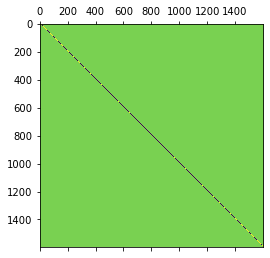

In [17]:
L = 1
N = 40 # the length
M = 40 # the width
dx = 1/N

def matrix(N,M, circle = False):
    matrix = np.zeros((N*M,N*M))
    i = 0
    for row in matrix:
        row[i] = -4
        if i >= M:
            row[i-M] = 1
        if i < (M-1)*N:
            row[i+M] = 1
        if (i+1)%M !=1:
            row[i-1] = 1
        if (i+1)%M !=0:
            row[i+1] = 1
        i = i+1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
    if circle:
        dist_list = np.array([])
        if N % 2 == 0:
            k = 0
        else:
            k = 0
        for i in range(N):
            i = i+0.5
            for j in range(M):
                j = j+ 0.5
                dist = np.sqrt((i-((N/2)+k))**2+(j-((M/2)+k))**2)
                dist_list = np.append(dist_list, dist)
        change_list = dist_list > (N/2)+k
#         print(change_list)
#         print(dist_list)
#         print((N/2)+k)
        for i in range(len(change_list)):
            if change_list[i]:
                matrix[:, i] = 0
                matrix[i, :] = 0
    i = 0
    for row in matrix:
        if row[i] != -4:
            row[i] = 1
        i+=1
    return matrix
m = matrix(N,M, True)
plt.matshow(m)
plt.show()
#print(m)
# eigen_vectors = eigs(m)
# eigsh(m)

In [ ]:
L = 1
N = 40 # the length
M = 40 # the width
dx = 1/N

def matrix(N,M, circle = False):
    matrix = np.zeros((N*M,N*M))
    i = 0
    for row in matrix:
        row[i] = -4
        if i >= M:
            row[i-M] = 1
        if i < (M-1)*N:
            row[i+M] = 1
        if (i+1)%M !=1:
            row[i-1] = 1
        if (i+1)%M !=0:
            row[i+1] = 1
        i = i+1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
    if circle:
        dist_list = np.array([])
        for i in range(N):
            i = i+0.5
            for j in range(M):
                j = j+ 0.5
                dist = np.sqrt((i-((N/2)+k))**2+(j-((M/2)+k))**2)
                dist_list = np.append(dist_list, dist)
        change_list = dist_list > (N/2)+k

        for i in range(len(change_list)):
            if change_list[i]:
                matrix[:, i] = 0
                matrix[i, :] = 0
    i = 0
    for row in matrix:
        if row[i] != -4:
            row[i] = 1
        i+=1
    return matrix
m = matrix(N,M, True)
plt.matshow(m)
plt.show()
#print(m)
# eigen_vectors = eigs(m)
# eigsh(m)

B) for the matrix of a 4x4 

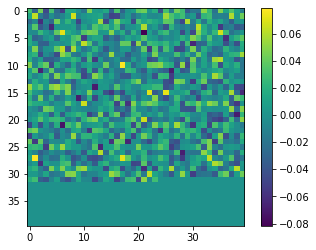

TypeError: 'NoneType' object is not callable

In [21]:
eigen = linalg.eigh(m)
#print(eigen)
values = eigen[0]
vectors = eigen[1]
# print(np.abs(values))
smallest = np.argmin(np.abs(values))
# print(smallest)
smallest_vector = vectors[smallest]
eigen_grid = np.reshape(smallest_vector, (N,M))
# plt.matshow(eigen_grid)
colormap = plt.imshow(eigen_grid, cmap='viridis')
plt.colorbar()
plt.show()

plots

C)

In [4]:
start_time = time.time()
eigen_vectors = linalg.eig(m)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.89389967918396 seconds ---


In [5]:
start_time = time.time()
eigen_vectors = eigs(m)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.16470623016357422 seconds ---
